## Complex regression 
## - multilinear regression model with more 2+ features

In [2]:
# main modules:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read/load data:
i = pd.read_csv("insurance.csv")
i.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# explore data:

In [4]:
i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
print(i["sex"].unique())
print(i["smoker"].unique())
print(i["region"].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


# encoding of categorical data:

In [6]:
# using manual binary approach for smoker:
# here i can use also the function but this is more simple approach:
i["smoker"] = i["smoker"].apply(lambda x: 0 if x == "no" else 1)
i.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [7]:
# using one hot encoding for sex - also halp manual approach:
i = pd.get_dummies(i, columns = ["sex"], drop_first = True)
i.head()

,age,bmi,children,smoker,region,charges,sex_male
0,19,27.900,0,1,southwest,16884.92400,0
1,18,33.770,1,0,southeast,1725.55230,1
2,28,33.000,3,0,southeast,4449.46200,1
3,33,22.705,0,0,northwest,21984.47061,1
4,32,28.880,0,0,northwest,3866.85520,1


In [8]:
# using ordinal encoder with a library!
from sklearn.preprocessing import OrdinalEncoder as oe

# function for ordinal encoder
def ordinal_encode(df, col):
    oeo = oe()
    col_to_encode = df[col]
    col_to_encode_2d = col_to_encode.values.reshape(-1, 1)
    encoded = oeo.fit_transform(col_to_encode_2d)
    df[col] = encoded
    df[col] = (
        df[col].apply(lambda x: int(x)))
    return df

# calling the function:
i = ordinal_encode(i, "region")
i.head()

,age,bmi,children,smoker,region,charges,sex_male
0,19,27.900,0,1,3,16884.92400,0
1,18,33.770,1,0,2,1725.55230,1
2,28,33.000,3,0,2,4449.46200,1
3,33,22.705,0,0,1,21984.47061,1
4,32,28.880,0,0,1,3866.85520,1


# rearange and corr:

In [9]:
# rearange columns:
c_stay = i.columns[0:5].to_list()
final_cols = c_stay + ["sex_male", "charges"]
i = i[final_cols]
i.head()

,age,bmi,children,smoker,region,sex_male,charges
0,19,27.900,0,1,3,0,16884.92400
1,18,33.770,1,0,2,1,1725.55230
2,28,33.000,3,0,2,1,4449.46200
3,33,22.705,0,0,1,1,21984.47061
4,32,28.880,0,0,1,1,3866.85520


In [10]:
# corr!
# smoking and age has a biggest correlation with target label!
corr = (
    i.corr().
    iloc[0:6].
    iloc[:, -1].
    sort_values(ascending = False) * 100
)

corr.apply(lambda x: np.round(x, 2))

smoker      78.73
age         29.90
bmi         19.83
children     6.80
sex_male     5.73
region      -0.62
Name: charges, dtype: float64

# plotting:

<AxesSubplot: >

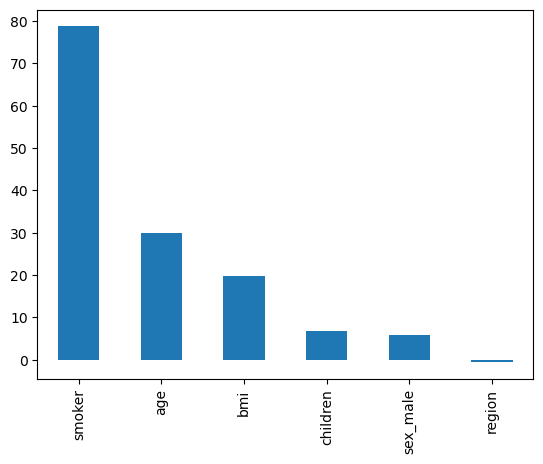

In [11]:
# visualize correlation:
corr.plot(kind = "bar")

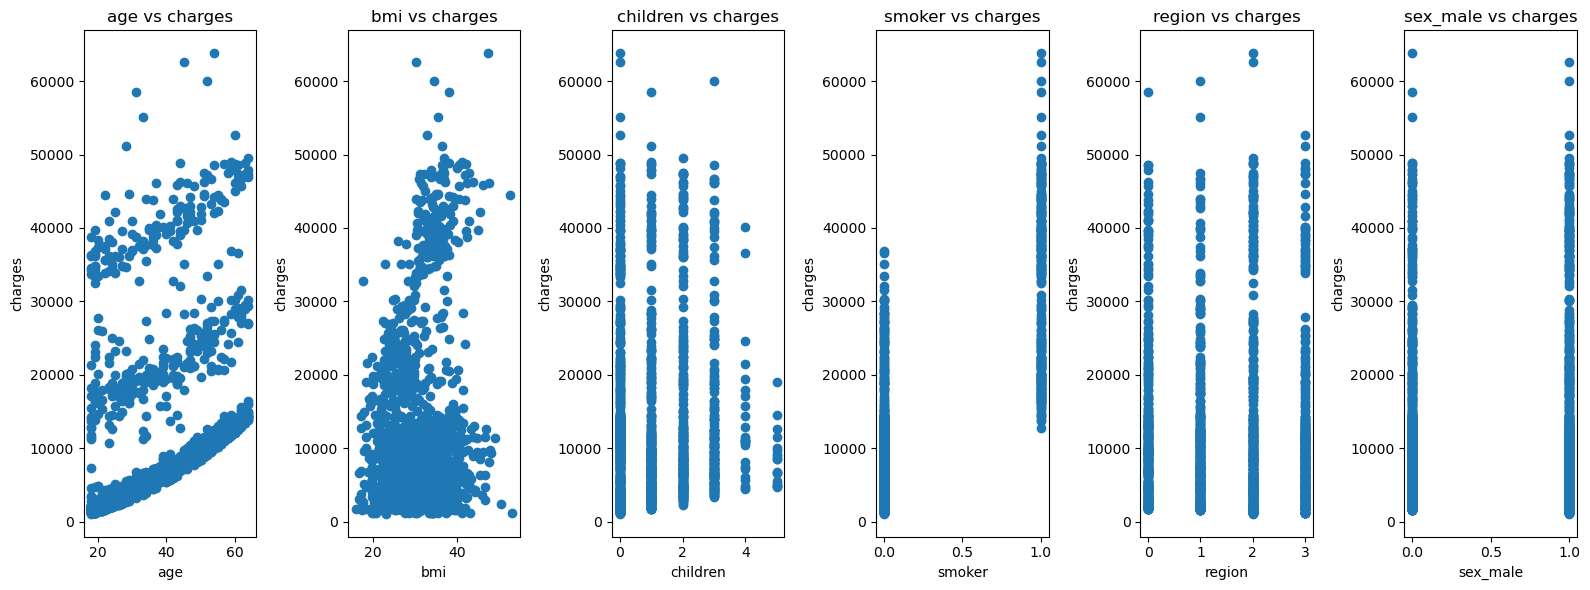

In [12]:
# plot side by side all features comparing it with target label:
target = i.columns[-1]
feature_columns = i.columns[i.columns != target]
# Set up subplots
num_plots = len(feature_columns)
fig, axes = plt.subplots(1, num_plots, figsize=(16, 6))
# Plot each column against 'charges' in a separate subplot
for a, feature_column in enumerate(feature_columns):
    axes[a].scatter(x=i[feature_column], y=i[target])
    axes[a].set_title(f"{feature_column} vs " + target)
    axes[a].set_xlabel(feature_column)
    axes[a].set_ylabel(target)
plt.tight_layout()
plt.show()

## using SVR with kernel:

In [13]:
# machine learning modules/libraries:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score, mean_squared_error

In [14]:
# setup the data:
X = i.iloc[:, :-1] # as all features
# X = i.iloc[:, 0:4] # as correlated features only
y = i[["charges"]] # as target label

In [15]:
# split the data:
X_train, X_test, y_train, y_test = (
    train_test_split(X, y, test_size = 0.2, random_state = 0))

In [16]:
# scaling the data!
scaler = StandardScaler()
X_norm_train = scaler.fit_transform(X_train)
X_norm_test = scaler.fit_transform(X_test)

In [ ]:
# using kernel:
svr = SVR(kernel = "poly", degree = 2, C = 2500)
svr.fit(X_norm_train, y_train)

In [ ]:
# predict:
y_pred = svr.predict(X_norm_test)
y_pred = np.round_(y_pred, decimals = 2)

In [ ]:
# assess the performance and accuracy of the model (y_test and y_pred):
mean_er = np.round(mean_squared_error(y_test, y_pred), 2)
r2 = np.round(r2_score(y_test, y_pred), 2)
print("Mean Squared Error is: ", mean_er) # from 0 to infinity and lower the better
print("R Square is: ", r2) # between 0 and 1 and closer to 1 is better

# fine tune parameters to find best ones:

In [17]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

# import SVC classifier
from sklearn.svm import SVR

# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svr = SVR()

In [18]:
parameters = [ {"C":[1, 10, 100, 1000, 3000, 5000], "kernel":["linear"]},
               {"C":[1, 10, 100, 1000, 3000, 5000], "kernel":["rbf"], "gamma":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {"C":[1, 10, 100, 1000, 3000, 5000], "kernel":["poly"], "degree": [2,3,4] , "gamma":[0.01,0.02,0.03,0.04,0.05]} 
              ]

In [19]:
grid_search = (
    GridSearchCV(estimator = svr,
                 param_grid = parameters,
                 cv = 5,
                 n_jobs = -1,
                 scoring = "neg_mean_squared_error",
                 verbose = 2,
                 refit = True))

In [20]:
# Fit the grid search to the data
grid_search.fit(X_norm_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Users\A427443\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters:  {'C': 5000, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score:  -26446887.059803806


# I -> using pure LinerRegression():

In [ ]:
# main modules for this section:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# setup the data:
X = i.iloc[:, :-1] # as all features
# X = i.iloc[:, 0:4] # as correlated features only
y = i[["charges"]] # as target label

In [ ]:
# split the data:
X_train, X_test, y_train, y_test = (
    train_test_split(X, y, test_size = 0.2, random_state = 0))

In [ ]:
# scaling the data!
scaler = StandardScaler()
X_norm_train = scaler.fit_transform(X_train)
X_norm_test = scaler.fit_transform(X_test)

In [ ]:
# model creation using LinearRegression():
model = LinearRegression()
model.fit(X_norm_train, y_train)

In [ ]:
# prediction:
y_pred = model.predict(X_norm_test)

In [ ]:
# assess the performance and accuracy of the model (y_test and y_pred):
mean_er = np.round(mean_squared_error(y_test, y_pred), 2)
r2 = np.round(r2_score(y_test, y_pred), 2)
print("Mean Squared Error is: ", mean_er) # from 0 to infinity and lower the better
print("R Square is: ", r2) # between 0 and 1 and closer to 1 is better

# II -> PolynomialFeatures()

In [ ]:
# main modules for this section:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# setup the data:
# X = i.iloc[:, :-1] # as all features
X = i.iloc[:, 0:4] # correlated features only
y = i[["charges"]] # as target label

In [ ]:
# preselect polynomial:
pol = PolynomialFeatures(degree = 2)
X_pol = pol.fit_transform(X)

In [ ]:
# split the data
X_train, X_test, y_train, y_test = (
    train_test_split(X_pol, y, test_size = 0.2, random_state = 0)
)

In [ ]:
# scaling the data:
scaler = StandardScaler()
X_norm_train = scaler.fit_transform(X_train)
X_norm_test = scaler.fit_transform(X_test)

In [ ]:
# train the model:
model = LinearRegression()
model.fit(X_norm_train, y_train)

In [ ]:
# prediction:
y_pred = model.predict(X_norm_test)

In [ ]:
# assess the performance and accuracy of the model (y_test and y_pred):
mean_er = np.round(mean_squared_error(y_test, y_pred), 2)
r2 = np.round(r2_score(y_test, y_pred), 2)
print("Mean Squared Error is: ", mean_er) # from 0 to infinity and lower the better
print("R Square is: ", r2) # between 0 and 1 and closer to 1 is better

In [ ]:
# convert y_test into a numpy array:
real_results = y_test.iloc[:, -1].values
predicted_results = y_pred.ravel()

In [ ]:
# more detailed comparison:
plt.scatter(range(len(real_results)),
            real_results, marker = "o",
            c = "orange",
            alpha = 0.5,
            label = 'Real Results')

plt.scatter(range(len(predicted_results)),
            predicted_results,
            marker = "o",
            c = "purple",
            alpha = 0.5,
            label = "Predicted Results")
plt.legend()
plt.show()

In [ ]:
# comparison II approach:
final_df = pd.DataFrame(
    {"Actual performance": real_results,
     "Predicted Performance": predicted_results})

# function for comparison:
def compute_difference(col):
    x = col["Actual performance"]
    y = col["Predicted Performance"]
    if x > y:
        return x - y
    else:
        return y - x
    
# apply the function:
final_df["Difference"] = final_df.apply(compute_difference, axis = 1)
final_df.head()

In [ ]:
# final comparison as average of diff:
mn = round(final_df["Difference"].mean(), 2)
print(f"Average difference value: {mn}")